In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.special as sp

import matplotlib.pyplot as plt

import spherepix.pixelation as pixelation
import spherepix.springdynamics as springs
from spherepix.plot import plot as splot

# Face regularization

This code regularizes one face of the pixelation (128x128) by running the spring system for `I=1000` iterations.

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


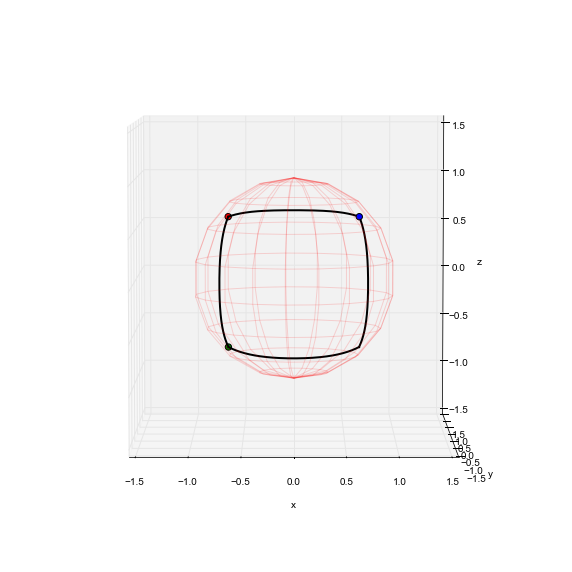

In [3]:
pixFace = pixelation.createFace(1, 128, I=1000, Ls=0)

fig, ax = splot.createFigure()
splot.addSphere(ax)
for face in pixFace:
    splot.plotContour(ax, face)

plt.show()

# Create and save pixelation

Create pixelations of size 1024x1024 with 3 pixels border. The spring system is run for 2000 iterations.

In [4]:
# MODE 1: use default parameters (C = 0.05)
pix = pixelation.createPixelation(1, 1024, 3, springIterations=2000, extraSeparation=2.0)
pixelation.savePixelation(pix, '../pixelations/M1_1024')

# MODE 2: use 0.025 velocity damping term
# pix = pixelation.createPixelation(2, 1024, 3, springIterations=2000, extraSeparation=2.0, C=0.025)
# pixelation.savePixelation(pix, '../pixelations/M2_1024')

# MODE 3: use 0.025 velocity damping term
# pix = pixelation.createPixelation(3, 1024, 3, springIterations=2000, extraSeparation=2.0, C=0.025)
# pixelation.savePixelation(pix, '../pixelations/M3_1024')

# Load and plot

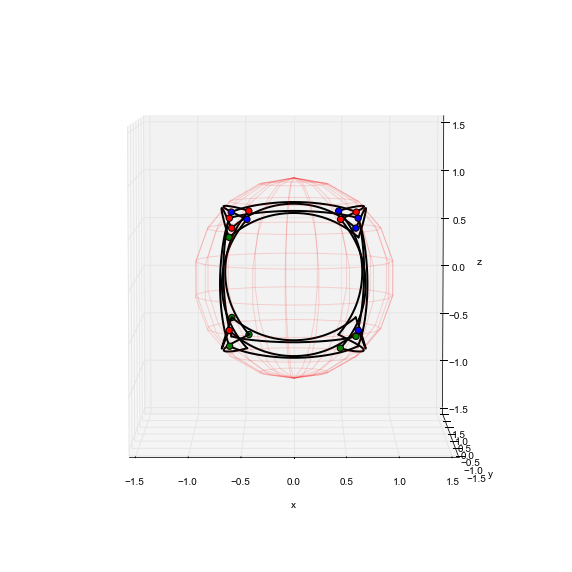

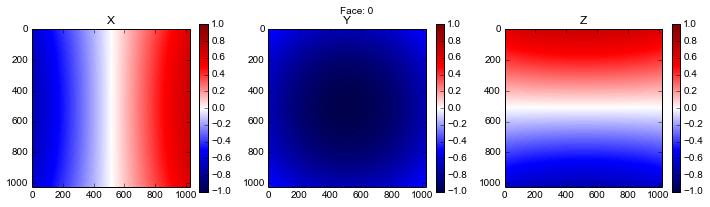

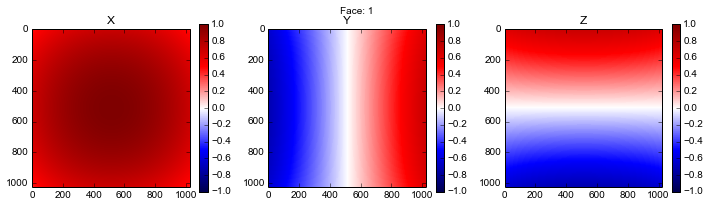

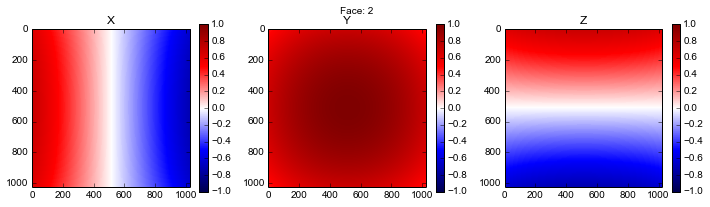

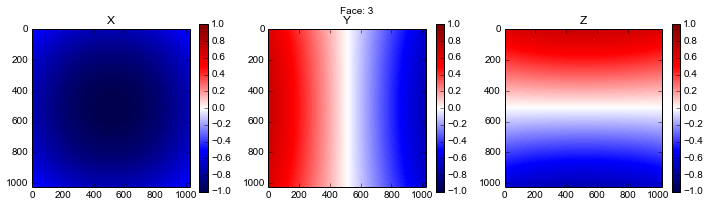

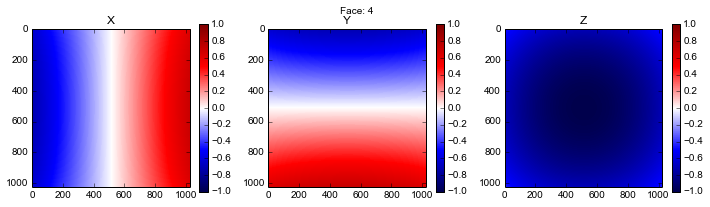

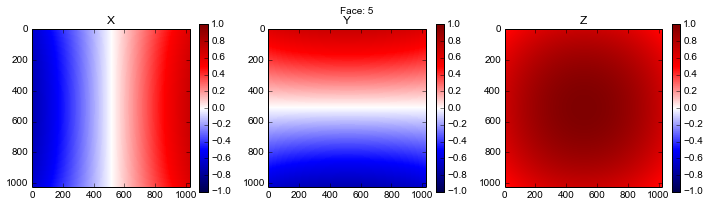

In [5]:
pix = pixelation.loadPixelation('../pixelations/M1_1024/pix.json')

fig, ax = splot.createFigure()
splot.addSphere(ax)
for k in range(pix.faceCount()):
    face = pix.faceCoordinates(k)
    splot.plotContour(ax, face)

plt.show()


for k in range(pix.faceCount()):
    face = pix.faceCoordinates(k)
    
    plt.figure(figsize=(12,3))
    plt.suptitle('Face: {0}'.format(k))
    
    labels = ['X', 'Y', 'Z']
    for n in range(3):
        plt.subplot2grid((1,3),(0,n)); plt.imshow(face[...,n],vmin=-1, vmax=1, cmap=plt.cm.get_cmap('seismic'));
        plt.colorbar(); plt.title(labels[n])
        
    plt.show()